<a href="https://colab.research.google.com/github/hi-jaxon/japanese-reader/blob/main/japanese_reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

print("Tensorflow version: " + tf.__version__)

Tensorflow version: 2.15.0


In [2]:
# Set path to folder of images
mypath = "drive/MyDrive/ETL8G_subset"

In [3]:
# Training/Validation data split
# Using 80% of images for training, 20% for validation

img_height, img_width, target_height, target_width, batch_size = 128, 127, 32, 32, 32

train_ds = tf.keras.utils.image_dataset_from_directory(
  directory=mypath,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

val_ds = tf.keras.utils.image_dataset_from_directory(
  directory=mypath,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

class_names = train_ds.class_names

Found 3220 files belonging to 20 classes.
Using 2576 files for training.
Found 3220 files belonging to 20 classes.
Using 644 files for validation.


In [4]:
# Improve performance while data is loading

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
"""
83.39% Accuracy
"""

# Create the model

num_classes = len(class_names)

data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.Rescaling(1./255),
        layers.experimental.preprocessing.Resizing(target_height, target_width),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
        layers.experimental.preprocessing.RandomTranslation(0.1, 0.1),
        layers.experimental.preprocessing.RandomContrast(0.8, 1.2),
    ]
)

# WORKED WELL ON 20 CATEGORIES
model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.build((None, target_height, target_width, 3))

# WORKING MODELS FOR 20 CATEGORIES
optimizer = keras.optimizers.Adam(learning_rate=0.00001)  # Adjust the learning rate
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

# Train the model for x epochs

epochs = 60 # try increasing epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 32)         

In [10]:
"""
Experimental model
Increase dropout to 0.4
"""

# # Create the model

# num_classes = len(class_names)

# data_augmentation = keras.Sequential(
#     [
#         layers.experimental.preprocessing.Rescaling(1./255),
#         layers.experimental.preprocessing.Resizing(target_height, target_width),
#         layers.experimental.preprocessing.RandomRotation(0.1),
#         layers.experimental.preprocessing.RandomZoom(0.1),
#         layers.experimental.preprocessing.RandomTranslation(0.1, 0.1),
#         layers.experimental.preprocessing.RandomContrast(0.8, 1.2),
#     ]
# )

# # WORKED WELL ON 20 CATEGORIES
# model = tf.keras.Sequential([
#   data_augmentation,
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Conv2D(32, 3, activation='relu'),
#   tf.keras.layers.MaxPooling2D(),
#   tf.keras.layers.Dropout(0.4),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(num_classes)
# ])

# model.build((None, target_height, target_width, 3))

# # WORKING MODELS FOR 20 CATEGORIES
# optimizer = keras.optimizers.Adam(learning_rate=0.00001)  # Adjust the learning rate
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# model.summary()

# # Train the model for x epochs

# epochs = 30 # try increasing epochs
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )

'\nExperimental model\nIncrease dropout to 0.4\n'

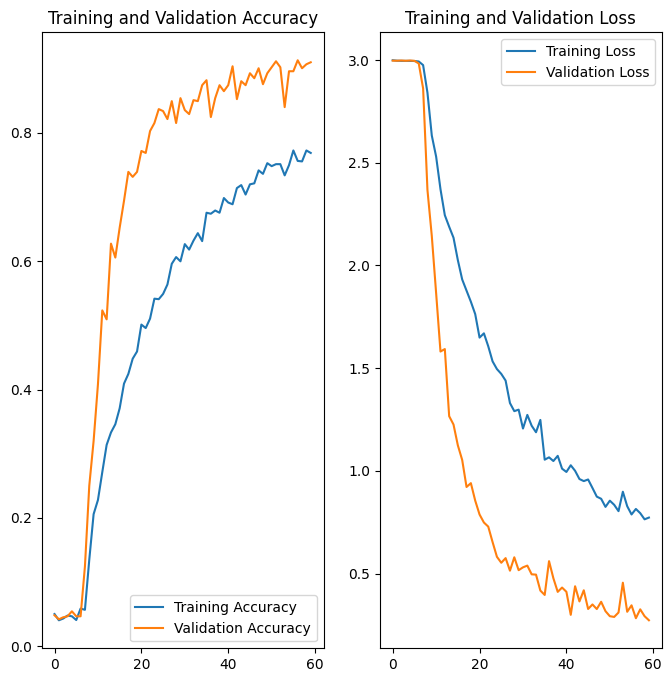

In [11]:
# Visualize training results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 134ms/step


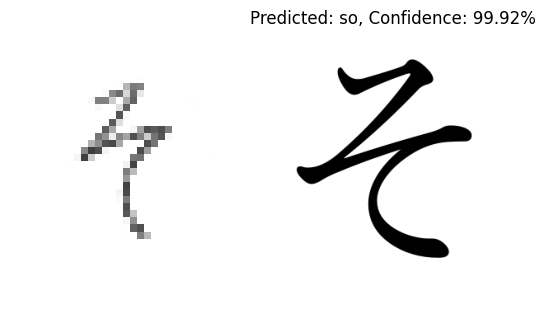

1/1 [==============================] - 0s 35ms/step


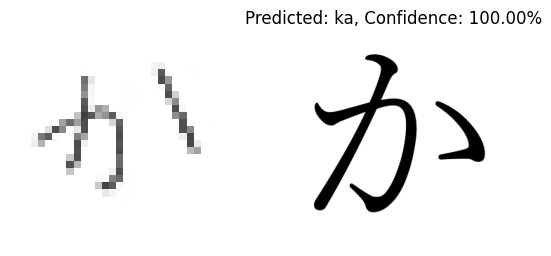

1/1 [==============================] - 0s 24ms/step


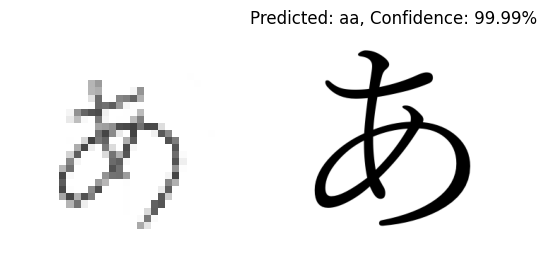

1/1 [==============================] - 0s 20ms/step


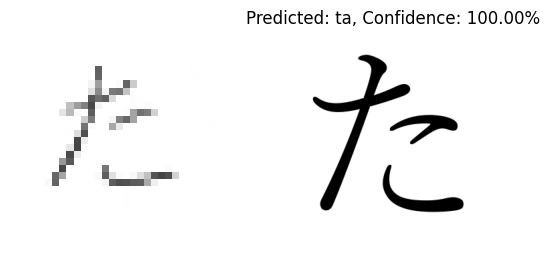

1/1 [==============================] - 0s 20ms/step


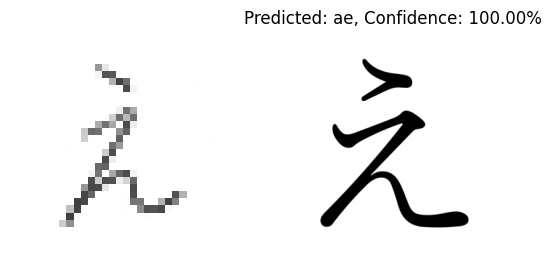

1/1 [==============================] - 0s 20ms/step


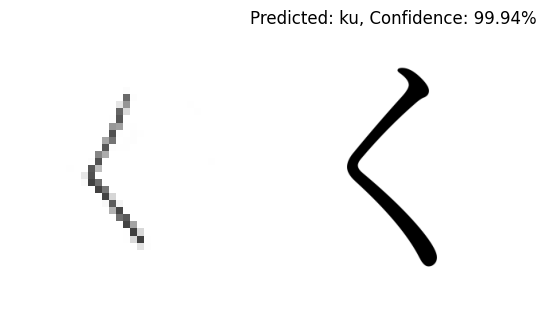

1/1 [==============================] - 0s 24ms/step


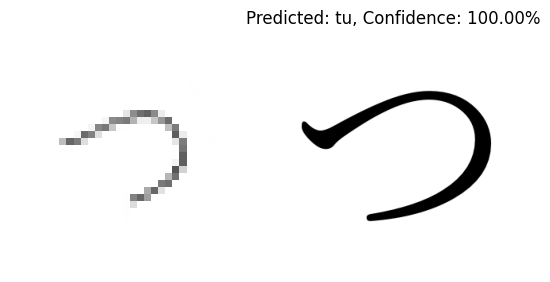

1/1 [==============================] - 0s 21ms/step


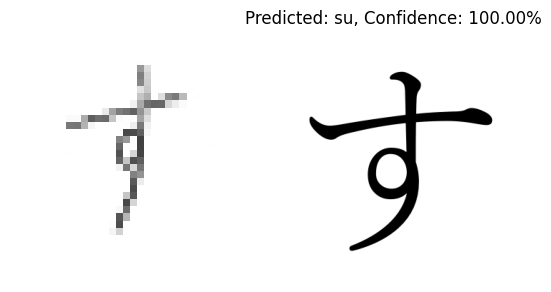

In [12]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming 'folder_path' is the path to the folder containing images
folder_path = "drive/MyDrive/my_test_images/"

# Get a list of all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]

# Hiragana typed images
typed_path = "drive/MyDrive/hiragana_typed"
hiragana_typed = [f for f in os.listdir(typed_path) if f.endswith('.png')]

for image_file in image_files:
    # Construct the full path to the image
    image_path = os.path.join(folder_path, image_file)

    # Load and preprocess the image
    img = tf.keras.utils.load_img(
        image_path, target_size=(target_height, target_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    # Make predictions
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    # Display the image
    plt.subplot(1, 2, 1)
    plt.imshow(img)  # test image
    plt.axis('off')  # Turn off axis labels

    plt.subplot(1, 2, 2)
    plt.axis('off')  # Turn off axis labels
    prediction = class_names[np.argmax(score)]
    prediction_img = mpimg.imread(typed_path + '/' + prediction + '.png')
    plt.imshow(prediction_img) # typed hiragana
    plt.title(f"Predicted: {class_names[np.argmax(score)]}, Confidence: {100 * np.max(score):.2f}%")
    plt.show()
